<a href="https://colab.research.google.com/github/Ravi4348/LABS-FMML/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [14]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [ ]:
def f(x):
    return x ** 2 + x + 1

In [ ]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

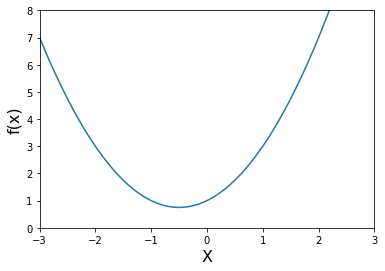

In [ ]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [ ]:
def df(x):
    return 2 * x + 1

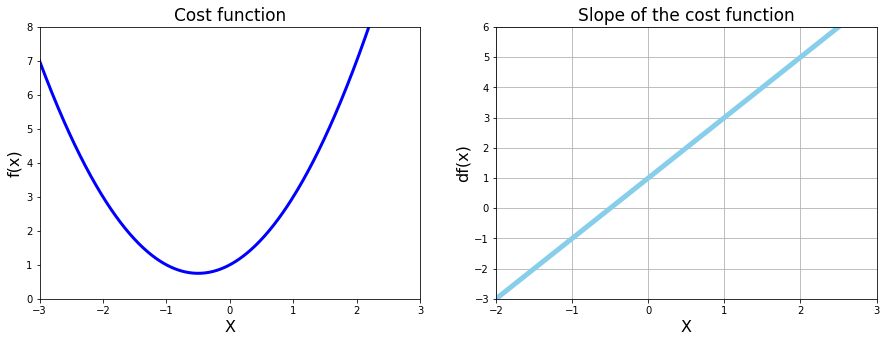

In [ ]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [29]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Define the functions f(x) and its derivative df(x)
# Example: For f(x) = x^2, df(x) = 2*x
def f(x):
    return x**2

def df(x):
    return 2*x

# Gradient Descent
new_x = 3  # Initial guess
previous_x = 0
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Convergence criterion

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # Compute the gradient
    new_x = previous_x - step_multiplier * gradient  # Update x using gradient descent

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # Store the gradient (slope) at the new x

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 50
Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


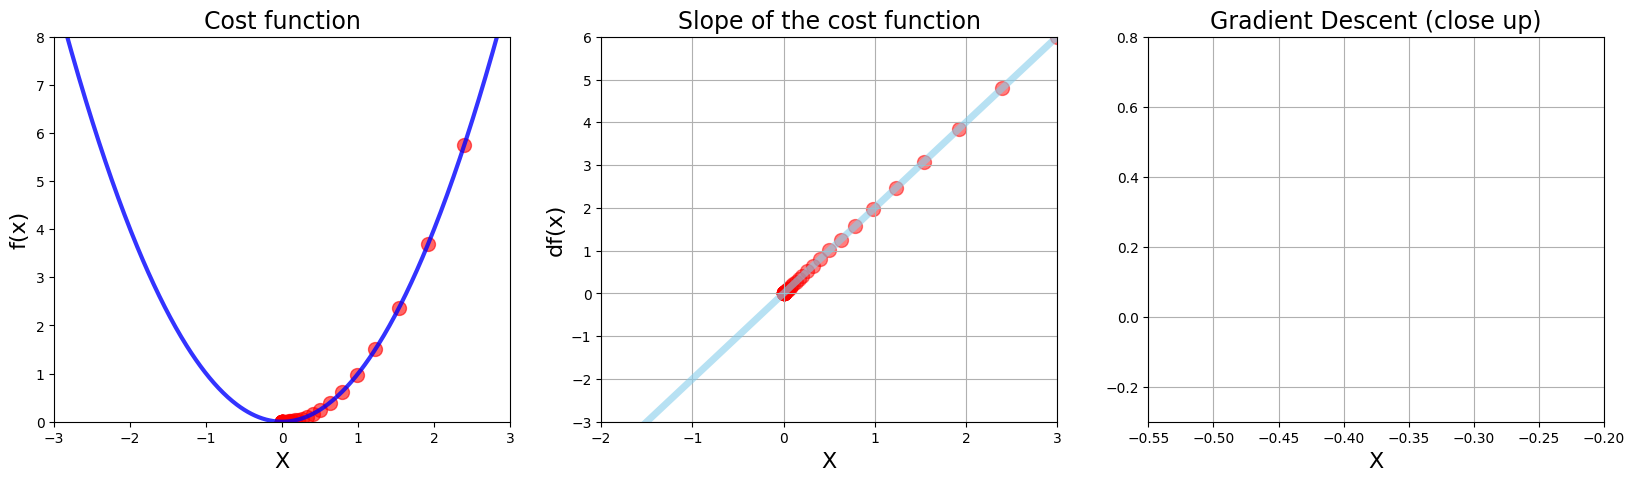

In [30]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [31]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return ## [REQUIRED]

def dg(x):
    return ## [REQUIRED]

In [32]:
## TASK-3 : Plot function and derivative side by side like has been done earlier

## Gradient Descent

In [33]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [35]:
# Define the gradient descent function
def gradient_descent(dg, start_x, learning_rate, precision):
    x = start_x  # Initial guess
    x_list = [x]  # To store all x values
    deriv_list = [dg(x)]  # To store all derivatives (slopes)

    while True:
        gradient = dg(x)  # Compute the gradient
        next_x = x - learning_rate * gradient  # Update x using gradient descent
        step_size = abs(next_x - x)  # Calculate step size

        # Update lists
        x_list.append(next_x)
        deriv_list.append(dg(next_x))

        if step_size < precision:  # Check for convergence
            break

        x = next_x  # Update current x for the next iteration

    return x, x_list, deriv_list  # Return the results

# Example derivative function: dg(x) = 2*x (from f(x) = x^2)
def dg(x):
    return 2 * x

# Run gradient descent
local_min, list_x, deriv_list = gradient_descent(dg, start_x=0.5, learning_rate=0.02, precision=0.001)

# Output results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: 0.02438042372491729
Number of steps: 76


In [38]:
# Define the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    x = initial_guess  # Start point
    x_list = [x]  # To store all x values
    deriv_list = [derivative_func(x)]  # To store all derivatives (slopes)

    while True:
        gradient = derivative_func(x)  # Compute the gradient
        next_x = x - multiplier * gradient  # Update x using gradient descent
        step_size = abs(next_x - x)  # Calculate step size

        # Update lists
        x_list.append(next_x)
        deriv_list.append(derivative_func(next_x))

        if step_size < precision:  # Check for convergence
            break

        x = next_x  # Update current x for the next iteration

    return x, x_list, deriv_list  # Return the results

# Example derivative function: dg(x) = 2*x (from f(x) = x^2)
def dg(x):
    return 2 * x

# Run gradient descent with the corrected function
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess=-0.5, multiplier=0.01, precision=0.0001
)

# Output results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -0.004994767327965779
Number of steps: 230


In [40]:
# Define the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001):
    """
    Perform gradient descent to find a local minimum.

    Parameters:
        derivative_func: Function to compute the derivative of f(x).
        initial_guess: Starting point for x.
        multiplier: Step size multiplier (default: 0.01).
        precision: Convergence threshold (default: 0.0001).

    Returns:
        local_min: The x value where the local minimum occurs.
        x_list: List of x values during the descent.
        deriv_list: List of derivative values during the descent.
    """
    x = initial_guess  # Start point
    x_list = [x]  # To store all x values
    deriv_list = [derivative_func(x)]  # To store all derivatives (slopes)

    while True:
        gradient = derivative_func(x)  # Compute the gradient
        next_x = x - multiplier * gradient  # Update x using gradient descent
        step_size = abs(next_x - x)  # Calculate step size

        # Update lists
        x_list.append(next_x)
        deriv_list.append(derivative_func(next_x))

        if step_size < precision:  # Check for convergence
            break

        x = next_x  # Update current x for the next iteration

    return x, x_list, deriv_list  # Return the results

# Example derivative function: dg(x) = 2*x (from f(x) = x^2)
def dg(x):
    return 2 * x

# Run gradient descent with default multiplier and precision
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess=-0.1
)

# Output results
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))


Local min occurs at: -0.00492816543300896
Number of steps: 151


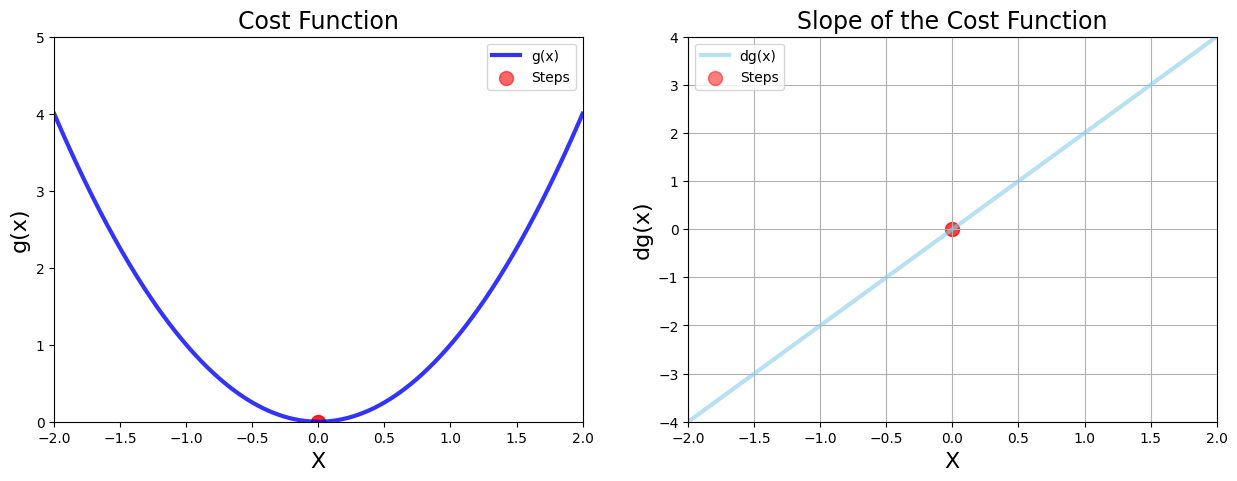

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its derivative
def g(x):
    return x**2  # Example cost function

def dg(x):
    return 2 * x  # Derivative of the cost function

# Gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001):
    x = initial_guess  # Start point
    x_list = [x]  # To store all x values
    deriv_list = [derivative_func(x)]  # To store all derivatives (slopes)

    while True:
        gradient = derivative_func(x)  # Compute the gradient
        next_x = x - multiplier * gradient  # Update x using gradient descent
        step_size = abs(next_x - x)  # Calculate step size

        # Update lists
        x_list.append(next_x)
        deriv_list.append(derivative_func(next_x))

        if step_size < precision:  # Check for convergence
            break

        x = next_x  # Update current x for the next iteration

    return x, x_list, deriv_list  # Return the results

# Call gradient descent
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0)

# Generate data for plotting
x_2 = np.linspace(-2, 2, 500)

# Plot the function and derivative
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0, 5)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8, label='g(x)')
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6, label='Steps')
plt.legend()

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-4, 4)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.6, label="dg(x)")
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5, label="Steps")
plt.legend()

plt.show()


### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

In [43]:
## TASK-4 : Code the same things as they were done for the first two examples

#### Learning Rate

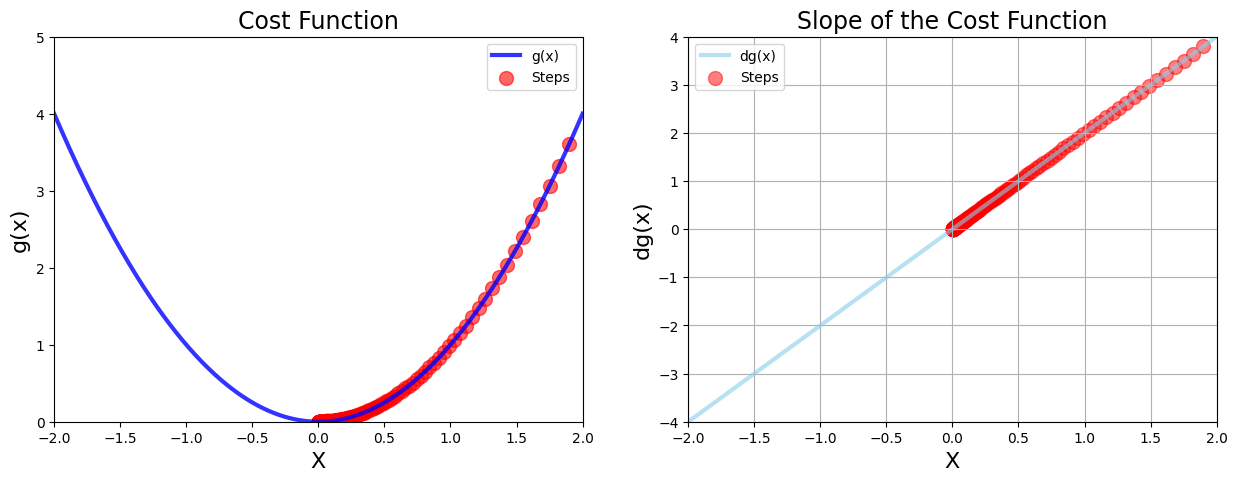

Number of steps is:  165


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its derivative
def g(x):
    return x**2  # Example cost function

def dg(x):
    return 2 * x  # Derivative of the cost function

# Gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.0001, max_iter=500):
    """
    Perform gradient descent to find a local minimum.

    Parameters:
        derivative_func: Function to compute the derivative of g(x).
        initial_guess: Starting point for x.
        multiplier: Step size multiplier (learning rate, default: 0.02).
        precision: Convergence threshold (default: 0.0001).
        max_iter: Maximum number of iterations (default: 500).

    Returns:
        local_min: The x value where the local minimum occurs.
        x_list: List of x values during the descent.
        deriv_list: List of derivative values during the descent.
    """
    x = initial_guess  # Start point
    x_list = [x]  # To store all x values
    deriv_list = [derivative_func(x)]  # To store all derivatives (slopes)

    for _ in range(max_iter):
        gradient = derivative_func(x)  # Compute the gradient
        next_x = x - multiplier * gradient  # Update x using gradient descent
        step_size = abs(next_x - x)  # Calculate step size

        # Update lists
        x_list.append(next_x)
        deriv_list.append(derivative_func(next_x))

        if step_size < precision:  # Check for convergence
            break

        x = next_x  # Update current x for the next iteration

    return x, x_list, deriv_list  # Return the results

# Call gradient descent
local_min, list_x, deriv_list = gradient_descent(
    derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500
)

# Generate data for plotting
x_2 = np.linspace(-2, 2, 500)

# Plot the function and derivative
plt.figure(figsize=[15, 5])

# 1st Chart: Cost function
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0, 5)
plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8, label='g(x)')
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6, label='Steps')
plt.legend()

# 2nd Chart: Derivative
plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-4, 4)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.6, label="dg(x)")
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5, label="Steps")
plt.legend()

plt.show()

# Print the number of steps
print('Number of steps is: ', len(list_x))


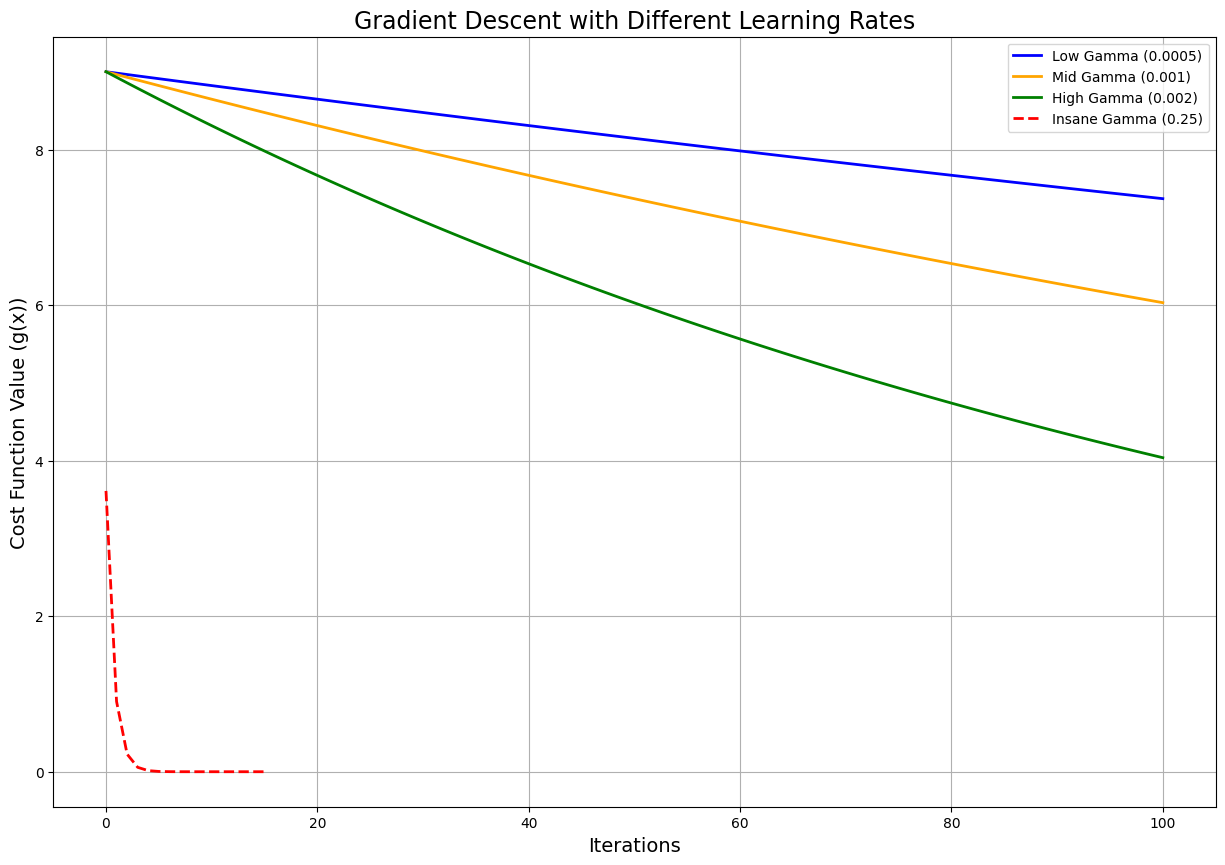

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its derivative
def g(x):
    return x**2  # Example cost function

def dg(x):
    return 2 * x  # Derivative of the cost function

# Gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001, max_iter=100):
    x = initial_guess  # Start point
    x_list = [x]  # To store all x values
    for _ in range(max_iter):
        gradient = derivative_func(x)  # Compute the gradient
        next_x = x - multiplier * gradient  # Update x using gradient descent
        step_size = abs(next_x - x)  # Calculate step size

        # Update lists
        x_list.append(next_x)

        if step_size < precision:  # Check for convergence
            break

        x = next_x  # Update current x for the next iteration

    return x_list  # Return the trajectory of x values

# Run gradient descent for different learning rates
n = 100  # Maximum number of iterations
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)

# Generate data for plotting
x_2 = np.linspace(-2, 2, 500)

# Plot the results
plt.figure(figsize=[15, 10])

# Plot low_gamma
plt.plot(range(len(low_gamma)), [g(x) for x in low_gamma], label='Low Gamma (0.0005)', color='blue', linewidth=2)
# Plot mid_gamma
plt.plot(range(len(mid_gamma)), [g(x) for x in mid_gamma], label='Mid Gamma (0.001)', color='orange', linewidth=2)
# Plot high_gamma
plt.plot(range(len(high_gamma)), [g(x) for x in high_gamma], label='High Gamma (0.002)', color='green', linewidth=2)
# Plot insane_gamma
plt.plot(range(len(insane_gamma)), [g(x) for x in insane_gamma], label='Insane Gamma (0.25)', color='red', linestyle='--', linewidth=2)

# Add labels and legend
plt.title('Gradient Descent with Different Learning Rates', fontsize=17)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost Function Value (g(x))', fontsize=14)
plt.legend()
plt.grid()
plt.show()


In [48]:
## TASK-7 : Plot reduction in cost for each iteration

### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [49]:
## TASK-8 : Code the same things as they were done for the first two examples

In [50]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


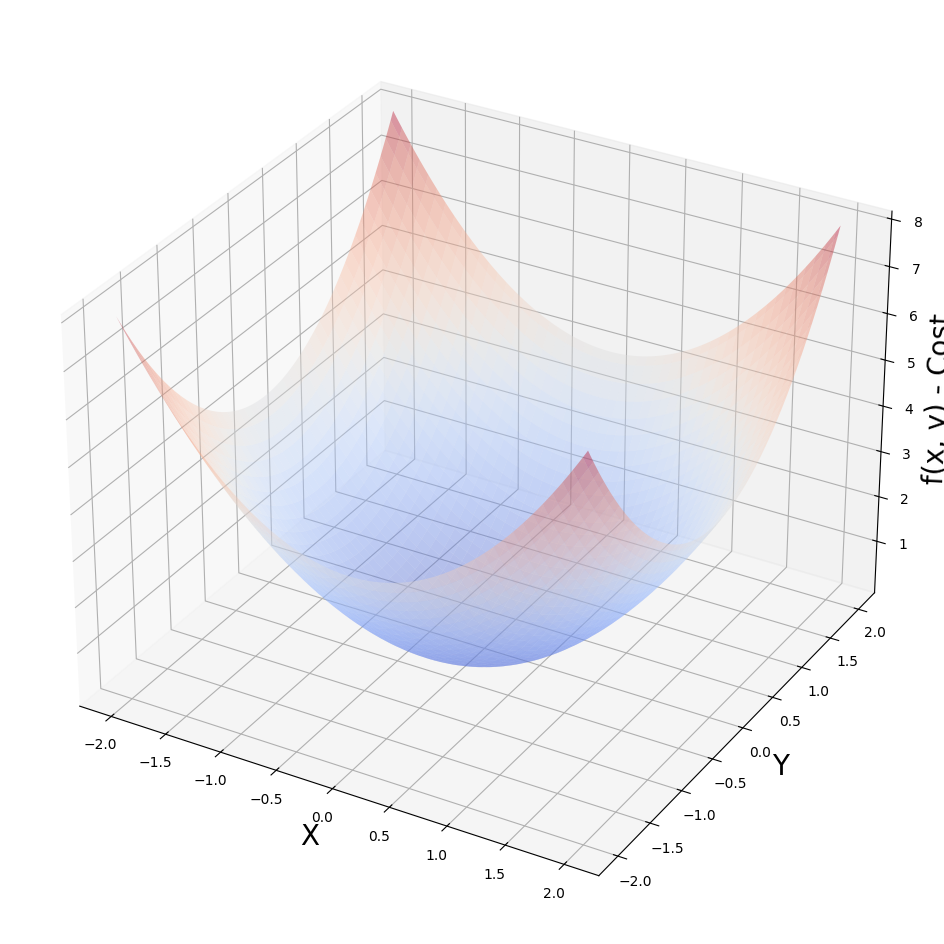

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the cost function
def f(x, y):
    return x**2 + y**2  # Example: A simple quadratic function

# Generate data for the 3D plot
x_4 = np.linspace(-2, 2, 100)  # Range for x
y_4 = np.linspace(-2, 2, 100)  # Range for y
x_4, y_4 = np.meshgrid(x_4, y_4)  # Create a meshgrid for 3D plotting
z_4 = f(x_4, y_4)  # Compute z values for the cost function

# Generate 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Set labels and plot surface
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.4)

plt.show()


### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [53]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  x**2 + y**2
Partial derivative wrt x is:  2*y
Value of f(x,y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [54]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


In [55]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

In [57]:
import numpy as np

# Define the cost function and its partial derivatives
def f(x, y):
    return x**2 + y**2  # Example: A simple quadratic function

def fpx(x, y):
    return 2 * x  # Partial derivative with respect to x

def fpy(x, y):
    return 2 * y  # Partial derivative with respect to y

# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # Initial guess

# Gradient descent loop
for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array:', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', f(params[0], params[1]))


Values in gradient array: [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of: 6.313439179878134e-49
Minimum occurs at y value of: 3.507466211043411e-49
The cost is: 5.216183349963152e-97




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [58]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20
The cost is:  7.300635289507557e-39


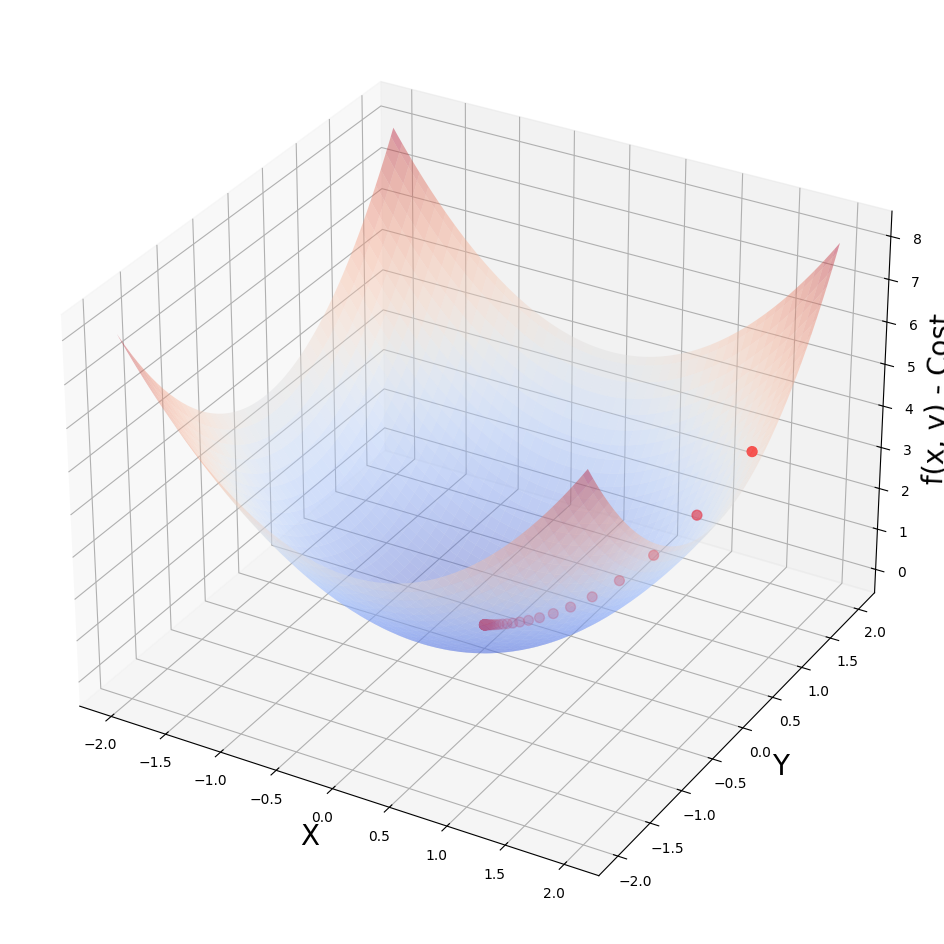

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the cost function
def f(x, y):
    return x**2 + y**2  # Example cost function

# Generate data for the 3D plot
x_4 = np.linspace(-2, 2, 100)  # Range for x
y_4 = np.linspace(-2, 2, 100)  # Range for y
x_4, y_4 = np.meshgrid(x_4, y_4)  # Create a meshgrid for 3D plotting
z_4 = f(x_4, y_4)  # Compute z values for the cost function

# Values array from a gradient descent process (e.g., generated during gradient descent)
# For demonstration purposes, we'll use a simple gradient descent for generating the path
values_array = np.array([[1.8, 1.0]])  # Initial guess
multiplier = 0.1
max_iter = 50  # Reduced for demo purposes

# Gradient descent loop to populate values_array
for n in range(max_iter):
    gradient_x = 2 * values_array[-1, 0]  # Partial derivative with respect to x
    gradient_y = 2 * values_array[-1, 1]  # Partial derivative with respect to y
    gradients = np.array([gradient_x, gradient_y])
    new_params = values_array[-1] - multiplier * gradients
    values_array = np.vstack((values_array, new_params))

# Plotting
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(x_4, y_4, z_4, cmap=cm.coolwarm, alpha=0.4)

# Plot the path of the gradient descent
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()


#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [61]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [62]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


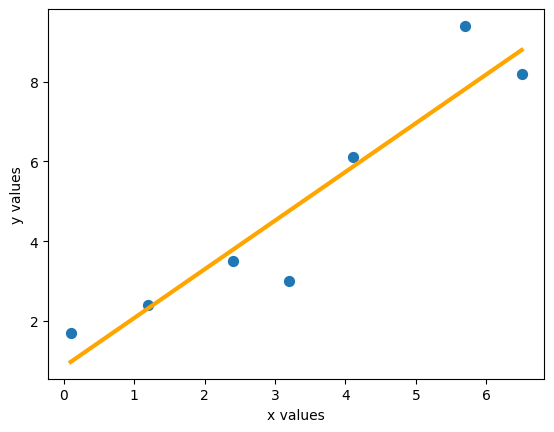

In [63]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [64]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [65]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [66]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [67]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [68]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-68-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


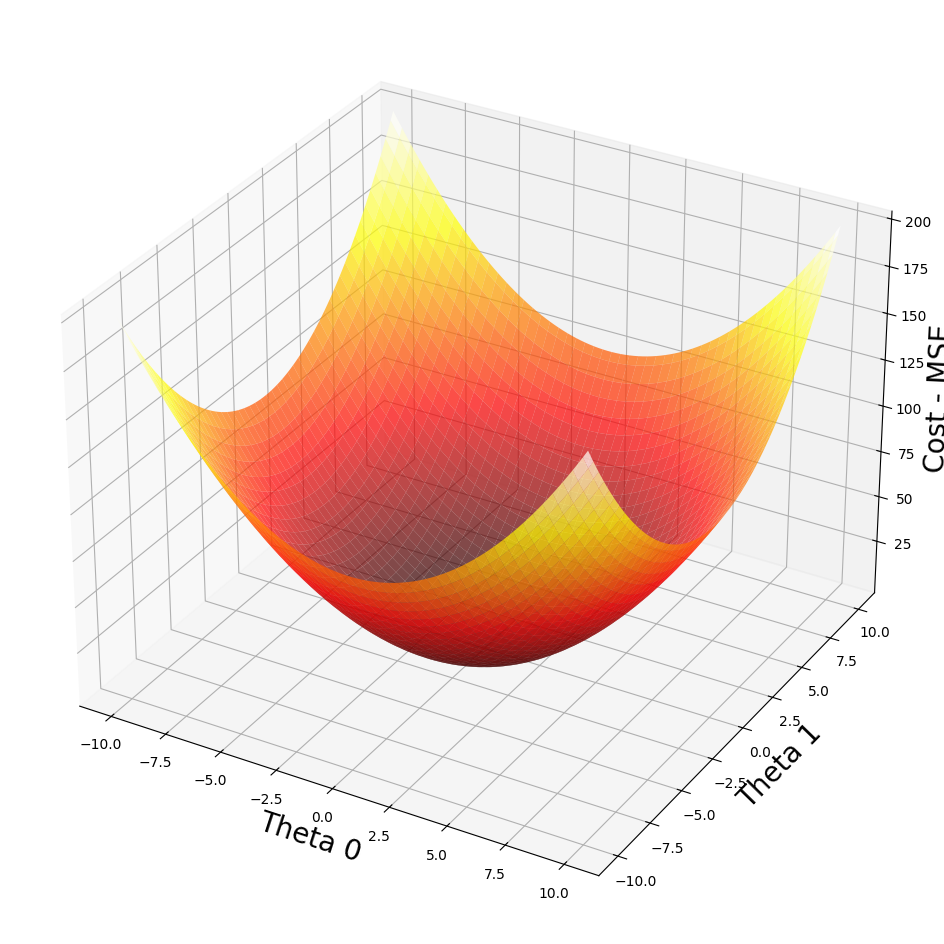

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Example data for plotting (assuming you have computed these values)
# plot_t0 and plot_t1 are parameter grids for the plot
plot_t0, plot_t1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))

# Compute the cost (MSE) for each combination of theta0 and theta1
# For simplicity, let's define a sample cost function for demonstration
# Example: MSE cost for a simple linear regression with a quadratic cost function
plot_cost = plot_t0**2 + plot_t1**2  # Replace this with your actual cost computation

# Plotting
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot, alpha=0.7)

plt.show()


In [72]:
# Assuming plot_cost, plot_t0, and plot_t1 are already defined as in the previous code

# Print the minimum value of the cost function
print('Min value of plot_cost:', plot_cost.min())

# Find the indices of the minimum value in plot_cost
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i, j):', ij_min)

# Print the corresponding values of Theta 0 and Theta 1 at the minimum point
min_theta_0 = plot_t0[ij_min]
min_theta_1 = plot_t1[ij_min]
print('Min MSE for Theta 0 at plot_t0[{}][{}]:'.format(ij_min[0], ij_min[1]), min_theta_0)
print('Min MSE for Theta 1 at plot_t1[{}][{}]:'.format(ij_min[0], ij_min[1]), min_theta_1)


Min value of plot_cost: 0.020406081012141343
Min occurs at (i, j): (49, 49)
Min MSE for Theta 0 at plot_t0[49][49]: -0.10101010101010033
Min MSE for Theta 1 at plot_t1[49][49]: -0.10101010101010033


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [73]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [74]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


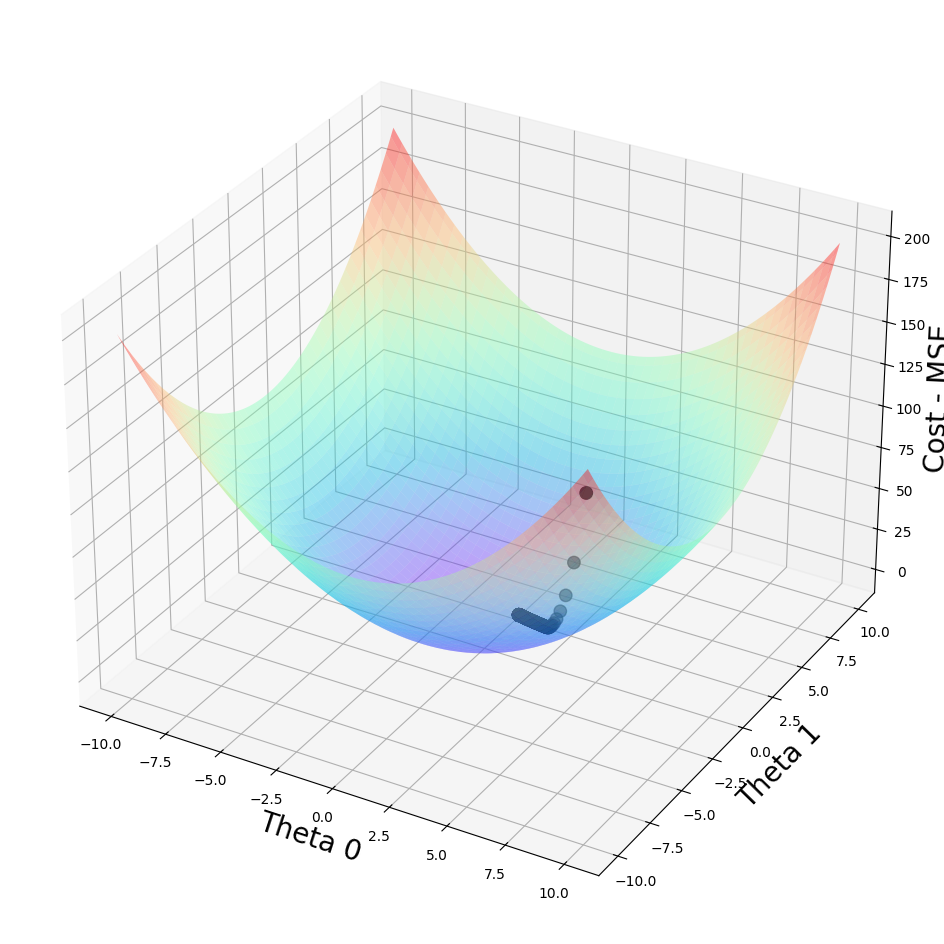

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Assuming plot_vals, mse_vals, plot_t0, plot_t1, and plot_cost are already defined
# plot_vals should be an array of shape (n_samples, 2) where each row is [theta0, theta1]
# mse_vals should be a 1D array with the MSE values corresponding to each point in plot_vals

# Create a 3D figure
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set axis labels
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the scatter points for the MSE values
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black', label='MSE Path')

# Plot the surface of the cost function
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)

# Display the plot
plt.show()
